In [2]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
sales_data = pd.read_csv("sales.csv")

In [41]:
# Check the data if all columns are numbers
sales_data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [42]:
sales_data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [46]:
# Drop the date-column as it's not needed and includes a timestamps, which can't be fitted.
# Kat wants to transform it
#sales_data.drop(columns=['date'], inplace=True)

In [ ]:
sales_data.columns.values[0] = "something"
sales_data.head()

In [4]:

sales_data.drop(columns=['something', 'store_ID'], inplace=True)

KeyError: "['something'] not found in axis"

In [7]:
# Handling with categorical variables, etc.
sales_data['state_holiday'].value_counts()

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [8]:
# Apply label encoding to 'state_holiday' column
sales_data['state_holiday'] = LabelEncoder().fit_transform(sales_data['state_holiday'])

# Check of the State holiday has been replaced correctly
sales_data['state_holiday'].value_counts()

state_holiday
0    621160
1     12842
2      4214
3      2624
Name: count, dtype: int64

In [9]:
# Select the continuous columns to scale
columns_to_scale = ['nb_customers_on_day', 'sales', 'promotion']

# Apply MinMax scaling to the selected columns
sales_data[columns_to_scale] = MinMaxScaler().fit_transform(sales_data[columns_to_scale])

# Display the first few rows to verify scaling
sales_data[columns_to_scale].head()

,nb_customers_on_day,sales,promotion
0,0.094723,0.106423,0.0
1,0.127153,0.199682,0.0
2,0.177721,0.234146,1.0
3,0.086662,0.156747,1.0
4,0.195676,0.261895,1.0


In [19]:
# Set plot style
plt.style.use('ggplot')

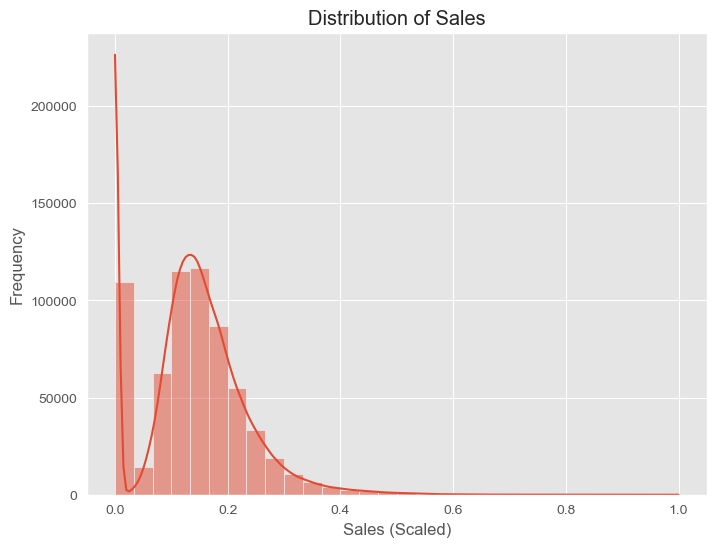

In [20]:
# 1. Analyze the distribution of the 'sales' variable
plt.figure(figsize=(8, 6))
sns.histplot(sales_data['sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales (Scaled)')
plt.ylabel('Frequency')
plt.show()

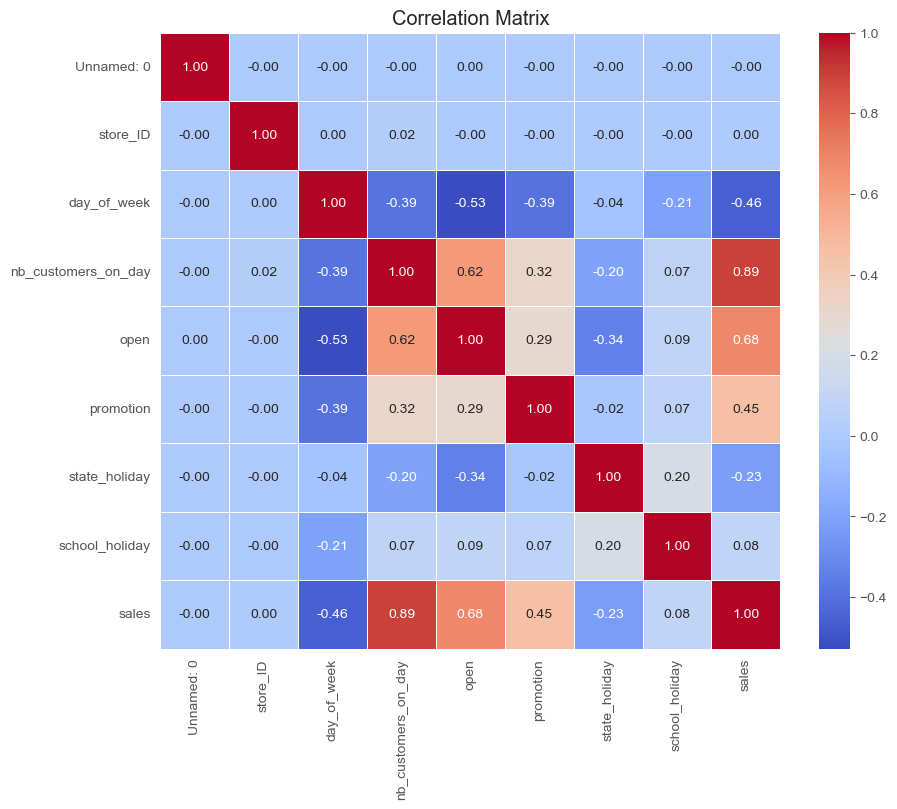

In [21]:
# 2. Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# define test_data as the complete file is very big. tag 50% for defining best model
test_data = sales_data[0:int(int(sales_data.size) * 0.5)]

In [37]:
X = test_data.drop(columns=['sales'])
y = test_data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Descision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=5),
    'Gradient Boosting': GradientBoostingRegressor(max_depth=2),
    'XGBoost': XGBRegressor()
}

# Step 3: Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print performance metrics
    print(f"{name} - R²: {r2:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

Linear Regression - R²: 0.85, RMSE: 0.04, MAE: 0.02
Descision Tree - R²: 0.86, RMSE: 0.04, MAE: 0.02
Random Forest - R²: 0.86, RMSE: 0.03, MAE: 0.02


KeyboardInterrupt: 